# BIOEE 4940 : **Introduction to Quantitative Analysis in Ecology**
### ***Spring 2021***
### Instructor: **Xiangtao Xu** ( ✉️ xx286@cornell.edu)
### Teaching Assistant: **Yanqiu (Autumn) Zhou** (✉️ yz399@cornell.edu)

---

## <span style="color:royalblue">Lab 1</span> *Python Basics, I/O, and Visualization*
*Partly adapted from [Earth and Environmental Data Science](https://earth-env-data-science.github.io/intro)*

* Python is an interpreted, high-level and general-purpose programming language, first released in 1991 by Guido van Rossum.

* R vs Python? (read more [here](https://dev.to/daveparr/the-real-difference-tm-between-python-and-r-for-data-science-280i))

<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--ReZqX08z--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://pbs.twimg.com/media/Ce8VP0FWIAI0ad2%3Fformat%3Djpg%26name%3Dsmall" alt="R vs Python" style="width: 600px;"/>


---

### 1. Fundamentals of Python

In this section, we will talk about some fundamental features of the Python language, including basic **data types, flow control, and mathematical operations**. Generally, these are also key aspects to quickly understand a programming langugage and its difference with other langugages. Some delicacies in the fundamentals might also lead to common bugs in your analyses.

Currently, the majority of the science community uses Python 3 although you might encounter legacy codes written in Python 2 in your own research. Sometimes, you will run into errors when running Python 2 codes with Python 3 because there are several key changes in Python 3, such as:

* `print` is a function
* Integer division returns a float 
* Unicode is used for encoding code
* ...

**1.1. Numbers and Math**

Numbers further include integers and floats (real numbers), which are stored differently in computer memory and might show different behaviors under mathematical and other operations.



In [1]:
# comments are anything that comes after the "#" symbol
a_int = 1 # assign an integer 1 to a_int
a_float = 1. # assign a float 1 to a_float

# python also support multiple destination variables when assigning values
a_int, a_float = 1 , 1.

# check their types
print(type(a_int))
print(type(a_float))

<class 'int'>
<class 'float'>


Basic mathematical operations in python includes arithmetic and boolean logic.

In [4]:
# addition / subtraction / multiplication / division

print(1 + 1 - 2 * 3 / 5)


0.8


Note that the results is a float although we only used integer. This is because **division in Python 3 by default returns a float**, while some other languages (e.g. C/Fortran) will truncate the fractions and return an integer, which can lead to bugs in your analysis

In [9]:
## exponentiation

print (2**10)
print (2**0.5)

## rounding

print(round(2**0.5, 4))

# modulo operation

print(12 % 7)   # get the modulus
print(12 // 7)  # get the integer



1024
1.4142135623730951
1.4142
5
1


In [15]:
# Logic and Boolean and relational operator

is_weekday = True
is_snow = False

print(is_weekday and is_snow)
print(is_weekday or is_snow)
print(not (is_weekday and is_snow))
print((not is_weekday) and is_snow) # try to use parenthesis whenever possible to improve readability

False
True
True
False


In [16]:
# comparison of number values

a = 5

print(a > 1)
print(a < 10.)
print(a == 5)  # equal
print(a != 5)  # not equal

True
True
True
False


Try to avoid using `==` or `!=` for floats because there could be **numerical errors** after complex mathematical operations.

In [17]:
# a simple example for numerical errors

b = (5 ** 0.0001) ** 10000
print(b)
print(a == b)


# instead compare whether the difference is small enough
abs_tol = 1e-8 # another way to define floats using scientific notation
print(abs(a - b) < abs_tol) # abs() returns the absolute value


5.000000000000083
False
True


**1.2 Strings**

Python has powerful supports for string operations that can comes very handy for dealing with text/character-based data (e.g. species names, genome sequences, qualitative data).

Note that the indexing in python **starts from 0 and is left inclusive**.

In [72]:
# string definition, use either "" or ''

treatment_level = "1"
print(type(treatment_level) is int)

burmese_python = "\"Python bivittatus\""
print(burmese_python)

# index starts from zero and is left inclusive
print(burmese_python[0])
name_length = len(burmese_python)
print(name_length)
print(burmese_python[name_length-1])
print(burmese_python[-1])
print(burmese_python[1:7])

# this one will throw out an error
print(burmese_python[name_length])


False
"Python bivittatus"
"
19
"
"
Python


IndexError: string index out of range

String is a built-in class in python, which has various useful class methods. See [here](https://docs.python.org/2.5/lib/string-methods.html) for more. Here I list a few examples.

In [82]:
# use """ for long strings
oaks = """Quercus rubra
Quercus alba
Quercus velutina"""

# capitalize, use tab to auto-complete the command in jupyter notebook
print(oaks.upper())

# split
print(oaks.split('\n')) # returns a list contains all the substrings

# join
print(' '.join(['Quercus','rubra','is','the','scientific','name','of','red','oak']))

# find the second occurance of a sub-string
print(oaks.find("Quercus",2))

# replace (does not change the original string)
print(oaks.replace("rubra","coccinea"))
print('\noriginal oaks:\n',oaks,'\n')

# String math operations
print(("duplicate" + " " + "myself ") * 5) # multiplication with positive integers

QUERCUS RUBRA
QUERCUS ALBA
QUERCUS VELUTINA
['Quercus rubra', 'Quercus alba', 'Quercus velutina']
Quercus rubra is the scientific name of red oak
14
Quercus coccinea
Quercus alba
Quercus velutina

original oaks:
 Quercus rubra
Quercus alba
Quercus velutina 

duplicate myself duplicate myself duplicate myself duplicate myself duplicate myself 


Strings can be converted from or into other numerical data types

In [48]:
# string to numbers
num_str = '1'
print(int(num_str))
print(float(num_str))

# numbers to string, check https://realpython.com/python-f-strings/ and https://pyformat.info/ for more details and tricks

pi_val = 3.1415926
print(f'the value of \u03C0 is {pi_val}')

# formatting floating numbers
# L.Sf where L indicates the total length of the final string
# S indicates the number of digits
print(f'the value of \u03C0 is {pi_val:4.2f}')

# formatting floating numbers into scientific notification
print(f'{12345678:5.3e}')

year, month, day = 2021, 2, 10
print(f'Today is {year:4d}-{month:02d}-{day:2d}') # formatting the integers, 02 means to use 0 for padding




1
1.0
the value of π is 3.1415926
the value of π is 3.14
1.235e+07
Today is 2021-02-10


**1.3 Lists and Loops**

List is the built-in structures to represent arrays, which can host heterogenous data types

In [62]:
oaks = """Quercus rubra
Quercus alba
Quercus velutina"""
oak_list = oaks.split('\n')
print(oak_list)


# append an element
oak_list.append(1)
print(oak_list)

# pop the last element
oak_list.pop()
print(oak_list)

# sort the list
oak_list.sort()
print(oak_list)

In [67]:
# Different methods loop over the elements of the list
for oak in oak_list:
    print(oak)

# use index
oak_num = len(oak_list)
for i in range(oak_num):
    print(oak_list[i])
    
# use enumerate
for i, oak in enumerate(oak_list):
    print(i,oak)
    
# enumerate is equivalent to
for i, oak in zip(range(len(oak_list)),oak_list):
    print(i,oak)

# enumerate function can be very handy to get access to both index and contents at the same time

Quercus alba
Quercus rubra
Quercus velutina
Quercus alba
Quercus rubra
Quercus velutina
0 Quercus alba
1 Quercus rubra
2 Quercus velutina
0 Quercus alba
1 Quercus rubra
2 Quercus velutina


In [70]:
# while loop
i = 0
while i < len(oak_list):
    print(oak_list[i])
    i = i+1

In [81]:
# conditionals and flow control (break/continue)

maple_list=['Acer saccharum','Acer rubrum','Acer platanoides']


tree_list = oak_list + maple_list # + can also operate on list!

print(tree_list)

for i, tree in enumerate(tree_list):
    if tree.split(' ')[0] == 'Quercus':
        continue # skip oaks
    
    if tree == 'Acer rubrum':
        break # break out of the loop when encountering red maple
    
    print(i,tree)
    
    
    

['Quercus alba', 'Quercus rubra', 'Quercus velutina', 'Acer saccharum', 'Acer rubrum', 'Acer platanoides']
3 Acer saccharum


In [84]:
# python has lots of tricks for working with lists

# list comprehension
squares = [n**2 for n in range(10)]
print(squares)

Cap_Genus_list = [tree.split(' ')[0].upper()+' '+tree.split(' ')[1] for tree in tree_list]
print(Cap_Genus_list)


[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
['QUERCUS alba', 'QUERCUS rubra', 'QUERCUS velutina', 'ACER saccharum', 'ACER rubrum', 'ACER platanoides']


**1.4 Tuples and Dictionaries**

Tuples are similar to lists, but they are ***immutable*** - they can not be extended or modified. So it is *safe* structure to pack together heterogeneous data that you do not want to change (e.g. results of a function).

In [88]:
genus='Quercus'
species='rubrum'
diameter=15.
is_alive=True
tree = (genus,species,diameter,is_alive)
print(tree)
print(tree[1]) # can be indexed like arrays

a,b,c,d = tree # can be unpacked
print(a,b,c,d)

tree[2] = 20. # error

('Quercus', 'rubrum', 15.0, True)
rubrum
Quercus rubrum 15.0 True


TypeError: 'tuple' object does not support item assignment

Dictionaries are useful ***unordered*** structure to map **keys** to **values**

In [90]:
tree_dict = {'genus' : 'Quercus',
             'species' : 'rubrum',
             'diameter' : 15.,
             'is_alive' : True}
print(tree_dict)

# OR
tree_dict={} # initialize an empty dictionary using {}
tree_dict['genus'] = 'Quercus'
tree_dict['species'] = 'rubrum'
tree_dict['diameter'] = 15.
tree_dict['is_alive'] = True

print(tree_dict)

print('age' in tree_dict.keys())
print('diameter' in tree_dict.keys())

for key, val in tree_dict.items():
    print(key,val)




{'genus': 'Quercus', 'species': 'rubrum', 'diameter': 15.0, 'is_alive': True}
{'genus': 'Quercus', 'species': 'rubrum', 'diameter': 15.0, 'is_alive': True}
False
True
genus Quercus
species rubrum
diameter 15.0
is_alive True


### 2. Numpy and Functions

Numpy is one of the most fundamental parts of the python "ecosystem" for science. Lots of packages are built on top of it.

Numpy includes support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions.

In [91]:
# import the package, similar to library command in R
import numpy as np  # notate the namespace to more specifically call numpy functions

In [94]:
arr = np.array([11.,12.5, 5.,7.])
print(arr.dtype)
print(arr.shape)


float64
(4,)


In [97]:
arr = np.array([[1,2,3],[4,5,6]])
print(arr.dtype)
print(arr.shape)
print(arr)

# note that python's matrix is column-first (c-style)
# elements in the last column are stored next to each other in the memory
# so any operation that manipulate the last column will be more efficient 
# than operating the first column
print(arr.ravel()) # ravel to one dimensional array


int64
(2, 3)
[[1 2 3]
 [4 5 6]]
[1 2 3 4 5 6]


In [112]:
# useful commands to generate data/index

print(np.arange(1.,2.,0.25)) # left inclusive
print(np.linspace(1.,2.,5)) # left and right inclusive
print(np.logspace(1.,2.,5)) # default has a 10-base

# matric creation
print(np.zeros((3,3))) # 3-by-3 zero matrix
print(np.ones((4,4))) # 4-by-4 unity matrix
print(np.diag(np.arange(4))) # diagonal matrix

lon = np.linspace(-100,-80,21)
lat = np.linspace(20,30,11)

xx,yy = np.meshgrid(lat,lon) # useful for plotting spatial maps
print(xx.shape,yy.shape)
print(xx)

[1.   1.25 1.5  1.75]
[1.   1.25 1.5  1.75 2.  ]
[ 10.          17.7827941   31.6227766   56.23413252 100.        ]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[0 0 0 0]
 [0 1 0 0]
 [0 0 2 0]
 [0 0 0 3]]
(21, 11) (21, 11)
[[20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 

Lots of array operations in numpy are available. All the familiar arithmetic operators are applied on an element-by-element basis

In [114]:
abundance_mat = np.random.random(xx.shape) 
# generate a [0,1) random matrix with the same shape as xx
print(abundance_mat)

In [120]:
print(abundance_mat > 0.1) # places with abudnance larger than 0.1
print(sum((abundance_mat > 0.1).ravel())) # total number of elements with abundance larger than 0.1
print(sum((abundance_mat > 0.1).ravel()) / len(abundance_mat.ravel())) # should be close to 0.9

[[ True  True  True  True False  True  True  True  True False  True]
 [ True  True  True  True  True  True  True False  True  True  True]
 [ True  True  True  True  True False  True False  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True False  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True]
 [False  True  True  True False  True  True  True  True  True  True]
 [ True  True False  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True]
 [False  True False  True  True  True  True  True  True  True False]
 [ True  True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True False  True False  True False  True  True]
 [ True  True  True  True  True  True  True False  True  True  True]
 [ True  True False  True  True  T

In [124]:
# numpy is efficient in matrix manipulation
# let's use a dot product as an example

# define a function to do dot product ourselves
def my_dot_prod(A,B):
    '''
        This is documentation for a function
    '''
    
    C = np.zeros_like(A)
    
    length = len(C.ravel())
    
    for i in range(length):
        C[i] = A[i] * B[i]
        
    return C

# use numpy dot product
def numpy_prod(A,B):
    
    return A * B


# lets check their performance
A = np.random.random(100)
B = np.random.random(100)

%timeit my_dot_prod(A,B)

%timeit numpy_prod(A,B)
    

24.5 µs ± 602 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
459 ns ± 9.75 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Note that values of numeric variables changed in fuctions will not be kept but values of lists/matrices changed in python functions will be kept.

In [129]:
def modify_values(a):
    a = 1
    b = 1
    print(f'in function a,b = {a}, {b}')
    return (a,b)

a, b = 0, 0
new_a,new_b = modify_values(a)

print(f'after function a,b = {a}, {b}')
print(f'after function new_a,new_b = {new_a}, {new_b}')


in function a,b = 1, 1
after function a,b = 0, 0
after function new_a,new_b = 1, 1


In [130]:
# note that values of lists/matrices changed in python functions will be kept


def modify_list(A,B):
    A.append('new_element')
    B[0] = 1.
    return

A = []
B = np.arange(5)
modify_list(A,B)
print(A)
print(B)



['new_element']
[1 1 2 3 4]


### 3. Pandas and Matplotlib

[Pandas](https://pandas.pydata.org/) is an open source library providing high-performance, easy-to-use data structures and data analysis. It organizes data similarly to R dataframes and is particularly suited to tabular data (e.g. data in excel spreadsheet/csv files)

[Matplotlib](https://matplotlib.org/) is the backbone of data visualization in python.

In [131]:
import pandas as pd

# the basic structure is Series - one-dimensional array with index.

Tree_ID = ['QR1','QR2','QA1','QA2','AR1','AR2']
diameter = [15.5,5.5,20.5,30.,55.,65.]

d_series = pd.Series(diameter,index=Tree_ID)
print(d_series)


QR1    15.5
QR2     5.5
QA1    20.5
QA2    30.0
AR1    55.0
AR2    65.0
dtype: float64


In [133]:
from matplotlib import pyplot as plt # import matplotlib
# allow for inline plotting in jupyter notebook
%matplotlib inline 

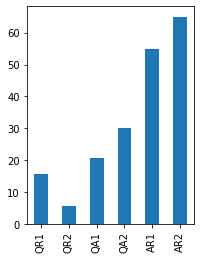

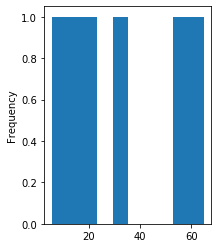

In [136]:
fig = plt.figure(figsize=(3,4)) # figsize in inches
axis_handle = d_series.plot(kind='bar')
# or d_series.plot.bar()


**Indexing**
We can get values using .loc attribute

In [142]:
print(d_series.loc[['QR1','QA1']]) # use index
print(d_series.iloc[[0,2]]) # use raw position

QR1    15.5
QA1    20.5
dtype: float64
QR1    15.5
QA1    20.5
dtype: float64


**DataFrame**
equivalent to a table in a spreadsheet

In [149]:
# assume we know the allometric equation to convert tree diameter to tree height
tree_height = np.exp(1.0 + 0.5 * np.log(d_series.values))

# add tree species
species_dict = {'QA' : 'Quercus Alba',
                'QR' : 'Quercus Rubrum',
                'AR' : 'Acer Rubrum'}

tree_species = [species_dict[tree_index[0:2]] for tree_index in d_series.index]

# create a datafrome from a dictionary
data = {'Species' : tree_species,
        'Diameter' : d_series.values,
        'Height' : tree_height}

df = pd.DataFrame(data,index=Tree_ID)
print(df)


            Species  Diameter     Height
QR1  Quercus Rubrum      15.5  10.701886
QR2  Quercus Rubrum       5.5   6.374936
QA1    Quercus Alba      20.5  12.307544
QA2    Quercus Alba      30.0  14.888643
AR1     Acer Rubrum      55.0  20.159318
AR2     Acer Rubrum      65.0  21.915489
<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, QR1 to AR2
Data columns (total 3 columns):
Species     6 non-null object
Diameter    6 non-null float64
Height      6 non-null float64
dtypes: float64(2), object(1)
memory usage: 192.0+ bytes


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, QR1 to AR2
Data columns (total 3 columns):
Species     6 non-null object
Diameter    6 non-null float64
Height      6 non-null float64
dtypes: float64(2), object(1)
memory usage: 192.0+ bytes


In [151]:
df.head(2)

,Species,Diameter,Height
QR1,Quercus Rubrum,15.5,10.701886
QR2,Quercus Rubrum,5.5,6.374936


In [154]:
df.min()

Species     Acer Rubrum
Diameter            5.5
Height          6.37494
dtype: object

In [153]:
df.mean()

Diameter    31.916667
Height      14.391303
dtype: float64

In [155]:
df.std()

Diameter    23.361114
Height       5.871059
dtype: float64

In [156]:
df.describe()

,Diameter,Height
count,6.000000,6.000000
mean,31.916667,14.391303
std,23.361114,5.871059
min,5.500000,6.374936
25%,16.750000,11.103301
50%,25.250000,13.598094
75%,48.750000,18.841649
max,65.000000,21.915489


Add column to a DataFrame

In [158]:
df['Volume'] = df['Height'] * np.pi * (df['Diameter'] / 200.) ** 2. # assume each tree is a cylinder
df.describe()

,Diameter,Height,Volume
count,6.000000,6.000000,6.000000
mean,31.916667,14.391303,2.289578
std,23.361114,5.871059,3.022760
min,5.500000,6.374936,0.015146
25%,16.750000,11.103301,0.253009
50%,25.250000,13.598094,0.729322
75%,48.750000,18.841649,3.855237
max,65.000000,21.915489,7.272232


Now let's explore pandas and matplotlib using a real data set

BAAD database

### 4. Spatio-temporal data with NETCDF4, Xarray, and Cartopy
TerraClimate?

/home/xiangtao/programs/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,taxonID,locationID,locality,country,countryCode,locationRemarks,establishmentMeans,lifeStage,occurrenceStatus,threatStatus,source
0,5190113,http://marineregions.org/mrgid/14291,West Atlantic,NaN,NaN,"from Massachusetts, USA, to Brazil",NaN,NaN,present,NaN,World Register of Marine Species
1,5190113,http://marineregions.org/mrgid/14308,West Coast of South Africa,South Africa,ZA,NaN,NaN,NaN,present,NaN,World Register of Marine Species
2,5190113,http://marineregions.org/mrgid/1905,Mediterranean Sea,NaN,NaN,NaN,NaN,NaN,present,NaN,World Register of Marine Species
3,5190113,http://marineregions.org/mrgid/1905,Mediterranean Sea,NaN,NaN,NaN,NaN,NaN,present,NaN,World Register of Marine Species
4,5190113,http://marineregions.org/mrgid/1912,North Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,present,NaN,World Register of Marine Species
